# Data Science Project 1

### Garrett Van Beek
### CMPS 3660 - Intro to Data Science
### Professor Nicolas Mattei
### Tulane University
### October 11, 2019

In [242]:
# don't forget: manually install lxml using the terminal

#import statements
import pandas as pd
import numpy as np
import requests as rq
import lxml as lxml
from bs4 import BeautifulSoup
import re


## Part 1, Step 1: Scrape data from Space Weather Live
- In this step I got an http request of the website in the url. 
- Then I extracted the text and parsed it as HTML using BeautifulSoup
- After that, I used .find to find the element with a table tag in the html.
- Then I used pandas.read_html to convert the html table to a pandas dataframe.
- Then I named the columns that were missing names names.

In [199]:
# URL from Space Weather Live
URL = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'

# Save http get request as variable
r = rq.get(url = URL)

# Save text from http get request to parsed html using Beautiful Soup
solar_soup = BeautifulSoup(r.text, 'html.parser')

# Get the table from the html
table = solar_soup.find(lambda tag: tag.name=='table')

read_in_html = pd.read_html(table.prettify(), index_col=0, header=0)

# Not sure how this works, but when I call read_in_html[0], I get the DataFrame I am looking for.
pd_table = read_in_html[0]

# Rename appropriate columns
pd_table = pd_table.rename(columns={'Unnamed: 1':'Class_x','Unnamed: 2':'Date', 'Unnamed: 7':'Movie'})

In [200]:
# ***** This is the result of Step 1 ******

pd_table

,Class_x,Date,Region,Start,Maximum,End,Movie
1,X28.0,2003/11/04,486,19:29,19:53,20:06,Movie View archive
2,X20.0,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
3,X17.2,2003/10/28,486,09:51,11:10,11:24,Movie View archive
4,X17.0,2005/09/07,808,17:17,17:40,18:03,Movie View archive
5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
6,X10.0,2003/10/29,486,20:37,20:49,21:01,Movie View archive
7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
9,X9.0,2006/12/05,930,10:18,10:35,10:45,Movie View archive
10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


## Part 1, Step 2: Tidy the Space Weather Data
- I dropped the movie column because it was unneccessary.

In [201]:
#Drop the movie column
pd_table = pd_table.drop(columns='Movie')


### Rewrite date as datetime object.
- I used re.split() to get individual integers from the date. Then I initialized a datetime object with the values. Finally I update the Date column with my datetime objects

In [202]:
import datetime

#rewrite each date as datetime object.
list_of_datetimes = []
for date in pd_table['Date']:
    d = re.split('/', date)
    date_object = datetime.datetime(int(d[0]),int(d[1]),int(d[2]))
    list_of_datetimes.append(date_object)
pd_table['Date'] = list_of_datetimes





### Rewrite start, end, and max times as datetimes.
- I realized a similar process as the on above to make Start_dt, End_dt, and Maximum_dt columns that contained datetime objects as values

In [203]:
#rewrite each start time as a datetime
start_dt_list = []
for i in range(len(pd_table['Date'])):
    starttime = re.split(':', pd_table['Start'].iloc[i])
    start_dt = datetime.datetime(
        pd_table['Date'].iloc[i].year,
        pd_table['Date'].iloc[i].month,
        pd_table['Date'].iloc[i].day,
        int(starttime[0]),
        int(starttime[1])
    )
    start_dt_list.append(start_dt)
pd_table['Start_dt'] = start_dt_list

#rewrite each end time as a datetime
end_dt_list = []
for i in range(len(pd_table['Date'])):
    endtime = re.split(':', pd_table['End'].iloc[i])
    end_dt = datetime.datetime(
        pd_table['Date'].iloc[i].year,
        pd_table['Date'].iloc[i].month,
        pd_table['Date'].iloc[i].day,
        int(endtime[0]),
        int(endtime[1])
    )
    end_dt_list.append(end_dt)
pd_table['End_dt'] = end_dt_list

#rewrite each max time as a datetime
max_dt_list = []
for i in range(len(pd_table['Date'])):
    maxtime = re.split(':', pd_table['Maximum'].iloc[i])
    max_dt = datetime.datetime(
        pd_table['Date'].iloc[i].year,
        pd_table['Date'].iloc[i].month,
        pd_table['Date'].iloc[i].day,
        int(maxtime[0]),
        int(maxtime[1])
    )
    max_dt_list.append(max_dt)
pd_table['Maximum_dt'] = max_dt_list


### Account for nan values.
- I used .replace to convert undesired nan values to the desired numpy.nan values

In [204]:
# Replace '-' values with np.nan
pd_table.replace(to_replace='-', value=np.nan)

# Drop the date column
pd_table = pd_table.drop(columns=['Date'])


In [205]:
pd_table['Rank'] = range(1,51)

In [206]:
# ***** This is the result of Step 2 *****

pd_table = pd_table[['Rank', 'Class_x', 'Start_dt', 'Maximum_dt', 'End_dt', 'Region']]
pd_table

,Rank,Class_x,Start_dt,Maximum_dt,End_dt,Region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


## Part 1, Question 3
- First I used http requests and beatufiul soup to get the html from nasa. Then I turned it into a list of rows.
- Afterwards, I trimmed the rows to only contain the table.
- Next, I used a for loop to iterate to the strings that were in my list of rows. I used beautiful soup to find the links within the html. The next step was a bit tricky. My goal was to split the list on whitespaces and then make a list of strings containing all the information for a row. Then I iteratively built a list of lists and turned it into a DataFrame.
    - I accomplished this by creating three different cases for dividing my strings depeding on the number of links in the strings. Then I parsed the values from the rows and added them to my list, which was later appended to my list of lists, thus accomplishing my goal.
- Once I had the list of lists, I turned it into a dataframe using pd.DataFrame().

In [207]:
# Scrape the NASA data
nasa_url = 'http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
# Save http get request as variable
nasreq = rq.get(url = nasa_url)

# Save text from http get request to parsed html using Beautiful Soup
nasa_soup = BeautifulSoup(nasreq.text, 'html.parser')

# Reform table as a list of rows
nasa_as_row_list = re.split('\n', nasa_soup.prettify())
nasa_as_row_list = nasa_as_row_list[20:-6]

# Divide rows and place entries into a DataFrame
nasa_list_for_df = []
#for i in range(len(nasa_as_row_list)):
for row in nasa_as_row_list:
    #print('\n' + row + '\n')
    
    bs_row = BeautifulSoup(row, 'html.parser')
    
    a_tags = bs_row.findAll(lambda tag: tag.name=='a')
    #print(a_tags)
    
    #if row contains 1 link
    templist = []
    
    entries = re.split('\s+', row)
    
    if (len(a_tags) == 1):
        
        #append cols 1-14
        templist.extend(entries[0:14])
        
        #strip a tags on link
        content = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[0]))
        
        #append col 15
        templist.append(content)
        
        nasa_list_for_df.append(templist)
    
    
    #if row contains 3 links
    if (len(a_tags) == 3):
        
        #append cols 1-4
        templist.extend(entries[0:4])
        
        #append cols 5-6
        col5 = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[0]))
        col6 = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[1]))
        templist.append(col5)
        templist.append(col6)
        
        #append cols 8-14
        templist.extend(entries[8:16])
        
        #append col 15
        col15 = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[2]))
        templist.append(col15)
        
        nasa_list_for_df.append(templist)
    
        #print(str(templist))
    
    # if row contains 5 links
    if (len(a_tags) == 5):
        #append cols 1-4
        templist.extend(entries[0:4])
        
        #append cols 5-6
        col5 = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[0]))
        col6 = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[1]))
        templist.append(col5)
        templist.append(col6)
        
        #append cols 7-9
        templist.extend(entries[8:11])
        
        #append col 10
        col10 = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[2]))
        templist.append(col10)
        
        #append col 11-13
        templist.extend(entries[13:16])
        
        #append cols 14-15
        col14 = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[3]))
        col15 = re.sub('</?a(?:(?= )[^>]*)?>', '', str(a_tags[4]))
        templist.append(col14)
        templist.append(col15)
        
        nasa_list_for_df.append(templist)
        
        #print(entries)
        #print(templist)
    #append the templist to the list of lists that will be turned into a DataFrame
    #nasa_list_for_df.append(templist)
        
df_nasa = pd.DataFrame(nasa_list_for_df, columns=['Start_Date',
                                                  'Start_Time',
                                                  'End_Date',
                                                  'End_Time',
                                                  'Start_Frequency',
                                                  'End_Frequency',
                                                  'Source_Location',
                                                  'NOAA',
                                                  'Flare_Importance',
                                                  'CME_Date',
                                                  'CME_Time',
                                                  'Central_Position_Angle',
                                                  'CME_Width',
                                                  'CME_Speed',
                                                  'Daily_Proton'])
df_nasa = df_nasa.drop(columns=['Daily_Proton'])

In [208]:
# ***** This is the Result of Step 3 *****
df_nasa

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Source_Location,NOAA,Flare_Importance,CME_Date,CME_Time,Central_Position_Angle,CME_Width,CME_Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2016/02/05,20:28,02/05,23:31,1650,500,------,-----,----,--/--,--:--,----,---,----
506,2016/02/05,22:35,02/05,22:55,5200,1900,------,-----,----,02/05,21:24,193,155,445
507,2016/05/04,14:20,05/04,14:34,14000,10500,N06W61,12535,C1.3,05/04,14:12,255,134,390
508,2016/05/24,17:00,05/24,20:50,1500,700,------,-----,----,--/--,--:--,----,---,----


## Part 1, Step 4: Tidy the data
- In order to make the data tidy, I:
    - Replace undesired null values with desired np.nan
    - Made values consistent with spelling and capitalization
- After that I:
    - Divided the CPA column into a boolean Halo column and a numeric Central_Position_Angle column.

In [209]:
# replace blank values with np.nan
df_nasa = df_nasa.replace(to_replace=['------','-----','----', '--/--', '---', '--:--'], value = np.nan)

# make Back values consistent
df_nasa = df_nasa.replace(to_replace=['Back?','BACK'], value = 'Back')

# make DSF the same as FILA
df_nasa = df_nasa.replace(to_replace=['DSF'], value = 'FILA')

df_nasa[(df_nasa['Flare_Importance'] == 'FILA') | (df_nasa['NOAA'] == 'FILA')]

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Source_Location,NOAA,Flare_Importance,CME_Date,CME_Time,Central_Position_Angle,CME_Width,CME_Speed
66,2000/04/18,15:00,04/18,16:00,14000,6000,S50W30,altr,FILA,04/18,14:54,195,105,668
86,2000/09/12,12:00,09/13,12:20,14000,60,S19W06,FILA,M1.0,09/12,11:54,Halo,360,1550
197,2002/07/29,12:10,07/29,12:45,4200,1300,N10W15,FILA,NaN,07/29,12:07,13,&gt;236,562
216,2003/01/20,19:10,01/20,20:00,14000,6000,N34W26,FILA,C1.7,01/20,18:30,315,105,733
217,2003/01/27,22:20,01/27,22:26,11000,8000,S17W23,FILA,C2.4,01/27,22:23,205,267,1053


In [210]:
# Add a Halo column
df_nasa['Halo'] = (df_nasa['Central_Position_Angle'] == 'Halo')

# set Halo CPAs to np.nan
df_nasa['Central_Position_Angle'] = df_nasa['Central_Position_Angle'].replace(to_replace='Halo', value= np.nan)

df_nasa

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Source_Location,NOAA,Flare_Importance,CME_Date,CME_Time,Central_Position_Angle,CME_Width,CME_Speed,Halo
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,True
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,True
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2016/02/05,20:28,02/05,23:31,1650,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
506,2016/02/05,22:35,02/05,22:55,5200,1900,NaN,NaN,NaN,02/05,21:24,193,155,445,False
507,2016/05/04,14:20,05/04,14:34,14000,10500,N06W61,12535,C1.3,05/04,14:12,255,134,390,False
508,2016/05/24,17:00,05/24,20:50,1500,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## Part 1, Step 4: Tidy the data (Cont.)
- For further data Tidyness, I:
    - Made a boolean column that indicates whether CME_Width is a lower bound.
    - Then I stripped the CME_width column of the > symbol that indicated a lower bound. Thanks to this, I converted the CME_width column to a numeric type.
- Then I rewrote the all dates and times as datettime objects (Start_dt, End_dt, CME_dt). I did this using a process like the one I detailed earlier.

In [211]:
# Make lower bound column
def check_for_gtr(mystring):
    return ('&gt;' in str(mystring))

def remove_gtr(mystring):
    if (type(mystring) == float):
        return mystring
    if (type(mystring) == str):
        return float(re.sub('[&gt;\nh]', '' , str(mystring)))

df_nasa['Lower_Bound'] = df_nasa['CME_Width'].apply(check_for_gtr)


# remove '>' sign from CME_Width
df_nasa['CME_Width'] = df_nasa['CME_Width'].apply(remove_gtr)

#
df_nasa[df_nasa['Lower_Bound'] == True]



,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Source_Location,NOAA,Flare_Importance,CME_Date,CME_Time,Central_Position_Angle,CME_Width,CME_Speed,Halo,Lower_Bound
21,1998/05/11,21:40,05/11,22:00,10000,1000,N32W90,8214,B6.6,05/11,21:55,208,301.0,830,False,True
30,1998/11/06,03:00,11/06,05:30,5000,1000,Back,NaN,NaN,11/06,02:18,159,160.0,405,False,True
39,1999/06/11,11:45,06/11,17:00,14000,400,N38E90,NaN,C8.8,06/11,11:26,35,181.0,1569,False,True
41,1999/06/23,05:50,06/23,07:10,12000,2000,Back,NaN,NaN,06/23,06:06,264,154.0,450,False,True
43,1999/06/28,21:03,06/28,21:10,3500,1500,N22W44,8592,C3.5,06/28,21:30,336,184.0,903,False,True
67,2000/05/04,11:10,05/04,13:00,6500,1000,S17W87,8970,M6.8,05/04,11:26,235,170.0,1404,False,True
71,2000/05/15,16:47,05/16,14:00,4800,40,S24W67,8993,C7.8,05/15,16:26,257,165.0,1212,False,True
78,2000/06/23,14:40,06/22,15:05,14000,2000,N26W72,9042,M3.0,06/23,14:54,282,198.0,847,False,True
80,2000/07/10,22:00,07/10,23:30,14000,1000,N18E49,9077,M5.7,07/10,21:50,67,289.0,1352,False,True
84,2000/07/22,11:45,07/22,12:45,14000,2000,N14W56,9085,M3.7,07/22,11:54,259,229.0,1230,False,True


In [212]:
# Combine dates and times as datetime objects
#df_nasa = df_nasa.drop([332])
nasa_start_dts = []
nasa_end_dts = []
nasa_cme_dts = []
#i = 0
for row in df_nasa.values:
    #print(i)
    #print(row)
    
    d = re.split('/', str(row[0]))
    t = re.split(':', str(row[1]))
    
    
    #handle case where hours is 24
    if (t[0] == '24'):
        t[0] = '00'
    
    dt_object = datetime.datetime(
        int(d[0]),
        int(d[1]),
        int(d[2]),
        int(t[0]),
        int(t[1])
    )
    
    ed = re.split('/', str(row[2]))
    et = re.split(':', str(row[3]))
    
    #handle case where hours is 24
    if (et[0] == '24'):
        et[0] = '00'
    edt_object = datetime.datetime(
        int(d[0]),
        int(ed[0]),
        int(ed[1]),
        int(et[0]),
        int(et[1]),
        
    )
    
    cd = re.split('/', str(row[9]))
    ct = re.split(':', str(row[10]))
    #Account for 24 hours
    if (ct[0] == '24'):
        ct[0] = '00'
    #Account for nans
    #print(cd)
    #print(ct)
    if (cd[0] != 'nan'):
        cdt_object = datetime.datetime(
            int(d[0]),
            int(cd[0]),
            int(cd[1]),
            int(ct[0]),
            int(ct[1]),
        )
    else:
        cdt_object = np.nan
    
    nasa_start_dts.append(dt_object)
    nasa_end_dts.append(edt_object)
    nasa_cme_dts.append(cdt_object)
    #i = i + 1

#nasa_start_dts
#print(len(nasa_start_dts))
#nasa_start_dts
#print(len(df_nasa))
df_nasa['Start_dt'] = nasa_start_dts
df_nasa['End_dt'] = nasa_end_dts
df_nasa['CME_dt'] = nasa_cme_dts
#df_nasa = df_nasa.drop(columns = ['Start_Date', 'Start_Time', 'End_Date', 'End_Time', 'CME_Date', 'CME_Time'])
df_nasa.head()
df_nasa = df_nasa[['Start_dt','End_dt','Start_Frequency','End_Frequency','Source_Location', 'NOAA', 'Flare_Importance','CME_dt',
                 'Central_Position_Angle', 'CME_Width', 'CME_Speed', 'Halo', 'Lower_Bound']]
df_nasa

,Start_dt,End_dt,Start_Frequency,End_Frequency,Source_Location,NOAA,Flare_Importance,CME_dt,Central_Position_Angle,CME_Width,CME_Speed,Halo,Lower_Bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79.0,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360.0,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360.0,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165.0,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155.0,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2016-02-05 20:28:00,2016-02-05 23:31:00,1650,500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False
506,2016-02-05 22:35:00,2016-02-05 22:55:00,5200,1900,NaN,NaN,NaN,2016-02-05 21:24:00,193,155.0,445,False,False
507,2016-05-04 14:20:00,2016-05-04 14:34:00,14000,10500,N06W61,12535,C1.3,2016-05-04 14:12:00,255,134.0,390,False,False
508,2016-05-24 17:00:00,2016-05-24 20:50:00,1500,700,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False


## Part 1, Step 4 (Cont.)
- I ensured that all my columns employed the correct data types. When they did not, I converted them using the pandas .apply() function to update columns as columns with the desired data types. 

In [213]:

#Change Numeric Columns to Numeric
def obj_to_float(obj):
    if ((obj == '????') | (obj == np.nan)):
        return np.nan
    return float(obj)

df_nasa['Start_Frequency'] = df_nasa['Start_Frequency'].apply(obj_to_float)
df_nasa['End_Frequency'] = df_nasa['End_Frequency'].apply(obj_to_float)

df_nasa['Central_Position_Angle'] = df_nasa['Central_Position_Angle'].apply(obj_to_float)
df_nasa['CME_Speed'] = df_nasa['CME_Speed'].apply(obj_to_float)

df_nasa.dtypes


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

Start_dt                  datetime64[ns]
End_dt                    datetime64[ns]
Start_Frequency                  float64
End_Frequency                    float64
Source_Location                   object
NOAA                              object
Flare_Importance                  object
CME_dt                    datetime64[ns]
Central_Position_Angle           float64
CME_Width                        float64
CME_Speed                        float64
Halo                                bool
Lower_Bound                         bool
dtype: object

In [214]:
# ***** This is the result of Part 1, Step 4 *****
df_nasa

,Start_dt,End_dt,Start_Frequency,End_Frequency,Source_Location,NOAA,Flare_Importance,CME_dt,Central_Position_Angle,CME_Width,CME_Speed,Halo,Lower_Bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2016-02-05 20:28:00,2016-02-05 23:31:00,1650.0,500.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False
506,2016-02-05 22:35:00,2016-02-05 22:55:00,5200.0,1900.0,NaN,NaN,NaN,2016-02-05 21:24:00,193.0,155.0,445.0,False,False
507,2016-05-04 14:20:00,2016-05-04 14:34:00,14000.0,10500.0,N06W61,12535,C1.3,2016-05-04 14:12:00,255.0,134.0,390.0,False,False
508,2016-05-24 17:00:00,2016-05-24 20:50:00,1500.0,700.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False


# Part 2: Analysis
## Question 1:
Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

## Answer:
In order to sort by flare importance, I created Flare_Class and Flare Strength Columns, then I sorted by these and took the top 50 values using iloc. I created a new data frame to observe the top fifty flares from both tables. There are some differences. The SpaceWeatherLive dataset contains some entries that are not in the NASA Dataset (see row 3)


In [215]:
def get_flare_class(imp):
    c = str(imp)[0:1]
    if (c == 'n'):
        return np.nan
    else:
        return c
    
def get_flare_strength(imp):
    s = re.sub('[^0-9.]', '', str(imp))
    if (s == ''):
        return np.nan
    else:
        return float(s)
df_nasa['Flare_Class'] = df_nasa['Flare_Importance'].apply(get_flare_class)
df_nasa['Flare_Strength'] = df_nasa['Flare_Importance'].apply(get_flare_strength)

df_nasa = df_nasa.sort_values(['Flare_Class','Flare_Strength'], ascending = [False, False])

df_nasa

top50 = df_nasa.iloc[0:50]
comparisonDict = {
    'Nasa_start_dt': top50['Start_dt'].tolist(),
    'Nasa_flare': top50['Flare_Importance'].tolist(),
    'Sol_start_dt': pd_table['Start_dt'].tolist(),
    'Sol_flare': pd_table['Class_x'].tolist()
}
df_comparison = pd.DataFrame(comparisonDict)
df_comparison

# In order to sort by flare importance, I created Flare_Class and Flare Strength Columns, then I sorted by these and took the
# top 50 values using iloc.
# I created a new data frame to observe the top fifty flares from both table. There are some differences. The SpaceWeatherLive
# dataset contains some entries that are not in the NASA Dataset (see row 3)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Nasa_start_dt,Nasa_flare,Sol_start_dt,Sol_flare
0,2003-11-04 20:00:00,X28.,2003-11-04 19:29:00,X28.0
1,2001-04-02 22:05:00,X20.,2001-04-02 21:32:00,X20.0
2,2003-10-28 11:10:00,X17.,2003-10-28 09:51:00,X17.2
3,2001-04-15 14:05:00,X14.,2005-09-07 17:17:00,X17.0
4,2003-10-29 20:55:00,X10.,2001-04-15 13:19:00,X14.4
5,1997-11-06 12:20:00,X9.4,2003-10-29 20:37:00,X10.0
6,2006-12-05 10:50:00,X9.0,1997-11-06 11:49:00,X9.4
7,2003-11-02 17:30:00,X8.3,2017-09-06 11:53:00,X9.3
8,2005-01-20 07:15:00,X7.1,2006-12-05 10:18:00,X9.0
9,2011-08-09 08:20:00,X6.9,2003-11-02 17:03:00,X8.3


## Question 2:
Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

## Answer:
I chose the use the Start Date that the flare occured on to join the two Datasets. By inner-joining the 75 strongest flares in the Nasa data, to the SpaceWeatherLive table, I was able to get a list of paired flares. These flares had the same dates, and a ranking from SpaceWeatherLive. This is how I successfully matched the Nasa data to the SpaceWeather data. I then used left join the add the Rank column to my df_nasa.


In [222]:
### QUESTION 2: MATCH THE NASA DATA WITH THE TOP 50 SOLAR FLARES
# It will be easiest two join the two tables with dates. 
df_nasa['Flare_ID'] = range(len(df_nasa['Start_dt']))

# Sort the nasa flares by strength
df_nasa = df_nasa.sort_values(['Flare_Class','Flare_Strength'], ascending = [False, False])
# get the top 75
top75 = df_nasa.iloc[0:75]

pd_table = pd_table.sort_values('Start_dt')

def get_date(dt):
    return dt.date()

#Use the date that the flare occured on to pair the Nasa data with the SpaceWeatherLive data
top75['Date'] = top75['Start_dt'].apply(get_date)
pd_table['Date'] = pd_table['Start_dt'].apply(get_date)

#Use inner join to get the values from NASA that match a value from SpaceWeatherLive
new_table = pd.merge(top75, pd_table, how='inner', on='Date')

new_table

#Left join this with the Nasa data, this way you have a rank column
df_nasa_with_rank = pd.merge(df_nasa, new_table[['Flare_ID', 'Rank']], on='Flare_ID', how='left')



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [223]:
# ***** This is the result of Part 2, Question 2 ******
df_nasa_with_rank

# I chose the use the Start Date that the flare occured on to join the two Datasets. By inner-joining the 75 strongest flares in
# the Nasa data, to the SpaceWeatherLive table, I was able to get a list of paired flares. These flares had the same dates, and
# a ranking from SpaceWeatherLive.
# I then used left join the bring add the Rank column to my df_nasa. See the code in the previous Notebook entry.


,Start_dt,End_dt,Start_Frequency,End_Frequency,Source_Location,NOAA,Flare_Importance,CME_dt,Central_Position_Angle,CME_Width,CME_Speed,Halo,Lower_Bound,Flare_Class,Flare_Strength,Flare_ID,Rank
0,2003-11-04 20:00:00,2003-11-04 00:00:00,10000.0,200.0,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360.0,2657.0,True,False,X,28.0,0,1.0
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,250.0,N19W72,9393,X20.,2001-04-02 22:06:00,261.0,244.0,2505.0,False,False,X,20.0,1,2.0
2,2003-10-28 11:10:00,2003-10-29 00:00:00,14000.0,40.0,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360.0,2459.0,True,False,X,17.0,2,3.0
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,40.0,S20W85,9415,X14.,2001-04-15 14:06:00,245.0,167.0,1199.0,False,False,X,14.0,3,5.0
4,2003-10-29 20:55:00,2003-10-29 00:00:00,11000.0,500.0,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360.0,2029.0,True,False,X,10.0,4,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2015-07-01 16:08:00,2015-07-01 20:47:00,1000.0,150.0,W90b,NaN,NaN,2015-07-01 14:36:00,NaN,360.0,1435.0,True,False,NaN,NaN,505,NaN
509,2016-02-05 20:28:00,2016-02-05 23:31:00,1650.0,500.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False,NaN,NaN,506,NaN
510,2016-02-05 22:35:00,2016-02-05 22:55:00,5200.0,1900.0,NaN,NaN,NaN,2016-02-05 21:24:00,193.0,155.0,445.0,False,False,NaN,NaN,507,NaN
511,2016-05-24 17:00:00,2016-05-24 20:50:00,1500.0,700.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,False,False,NaN,NaN,508,NaN


## Question 3, Part 2:

1. A short description (2 sentences) of what the intent of your plot is (think in terms of our discussion and notebooks on how we show variation, co-variation in terms of summary statistics like central trend, spread, skew etc.),
    - I created a pie chart to show the proportion of top solar flares with halos. This will show us how prevalent halos are in our the strongest solar flares.
2. code to produce your plot,

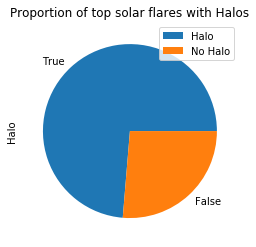

In [241]:
# PART 2, QUESTION 3 Integration

my_pie = new_table['Halo'].value_counts().plot.pie(title = 'Proportion of top solar flares with Halos')
my_pie.legend(['Halo','No Halo'])
#my_pie.title = ()

## Question 3, Part 2 (Cont.)
3. a short text description of your plot
    - This plot shows the proportion of top solar flares that have halos. This plot represents the two different parts of the whole: (1) top solar flares with halos, and (2) top solar flares without halos.
4. a sentence or two of interpretation of your plot (again think of variation, co-variation, etc.).
    - From this plot we can interpret that majority of top solar flares have halos (a little less than 75%)